<a href="https://colab.research.google.com/github/Morium23/CIT_Projects/blob/main/Titanic_KNN_NB_LoR_SVM_DT_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import All Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# (1) Load Dataset

In [ ]:
df = pd.read_csv('/var/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

# (2) Visualization

In [ ]:
Y.value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

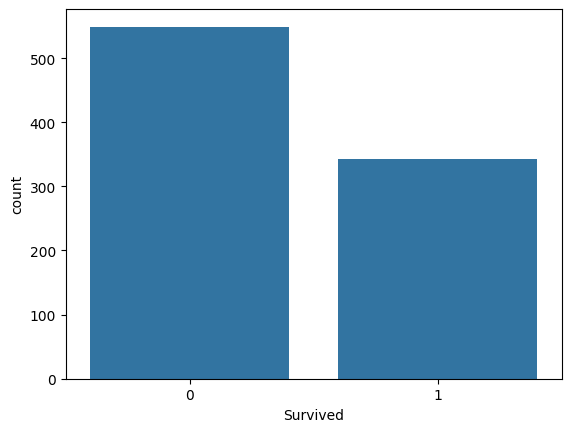

In [ ]:
sns.countplot(x='Survived', data=df)

The target column is Survived. The dataset is also imbalanced.

In [ ]:
X = X.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


Drop the columns that are not contributing in our analysis

# (3) Data Cleaning

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex_transformed = le.fit_transform(X['Sex'])
X['Sex'] = sex_transformed
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


There are some null values in the Age column so we use fillna

In [ ]:
X['Age'] = X['Age'].fillna(0)

# Standardize features

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Doing StandardScaling to represent the values using mean and standard deviation. It is must before going for PCA

In [ ]:
x_scaled

array([[ 0.82737724,  0.73769513, -0.10231279,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693, -1.35557354,  0.80749164,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724, -1.35557354,  0.12513832, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724, -1.35557354, -1.35329389,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693,  0.73769513,  0.12513832, -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724,  0.73769513,  0.46631498, -0.4745452 , -0.47367361,
        -0.49237783]])

SMOTE -> balanced the dataset

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(x_scaled , Y)

In [ ]:
Y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
Y_resampled.value_counts()

,count
Survived,
0,549
1,549


We can see the target column is balanced now

# Apply PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
X_resampled_pca = pca.fit_transform(X_resampled)

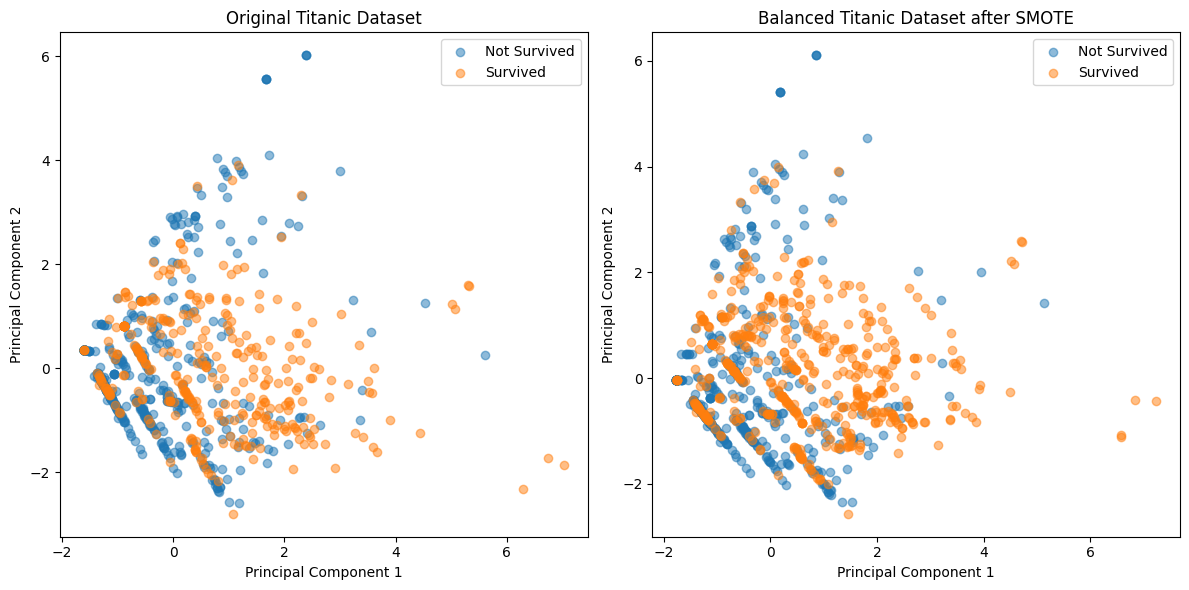

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[Y == 0, 0], X_pca[Y == 0, 1], label='Not Survived', alpha=0.5)
plt.scatter(X_pca[Y == 1, 0], X_pca[Y == 1, 1], label='Survived', alpha=0.5)
plt.title('Original Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_pca[Y_resampled == 0, 0], X_resampled_pca[Y_resampled == 0, 1], label='Not Survived', alpha=0.5)
plt.scatter(X_resampled_pca[Y_resampled == 1, 0], X_resampled_pca[Y_resampled == 1, 1], label='Survived', alpha=0.5)
plt.title('Balanced Titanic Dataset after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
list(Y_resampled).count(1)

549

In [ ]:
list(Y_resampled).count(0)

549

# (5) Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 6), (330, 6), (768,), (330,))

In [ ]:
y_train

,Survived
674,0
181,0
780,1
533,1
9,1
...,...
1033,1
763,1
835,1
559,1


# Applying ML algorithms

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
accuracy_train_list = []
accuracy_test_list = []
f1_train_list =[]
f1_test_list=[]
for i in range(3,30):

    print('K',i)

    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)

    # Training
    neigh.fit(X_resampled, Y_resampled)

    # Test the training data
    y_pred_train = neigh.predict(X_train)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_train_list.append(accuracy_train)
    f1_train = f1_score(y_pred_train,y_train)
    f1_train_list.append(f1_train)

    # Test the test data
    y_pred_test = neigh.predict(X_test)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    accuracy_test_list.append(accuracy_test)
    f1_test = f1_score(y_pred_test,y_test)
    f1_test_list.append(f1_test)

    print('Accuracy: Train vs Test')
    print(accuracy_train,accuracy_test)
    print('f1 score: Train vs Test')
    print(f1_train,f1_test)
    print()

K 3
Accuracy: Train vs Test
0.8984375 0.8848484848484849
f1 score: Train vs Test
0.896551724137931 0.8875739644970414

K 4
Accuracy: Train vs Test
0.87890625 0.8606060606060606
f1 score: Train vs Test
0.869198312236287 0.8553459119496857

K 5
Accuracy: Train vs Test
0.8567708333333334 0.8727272727272727
f1 score: Train vs Test
0.8521505376344085 0.875739644970414

K 6
Accuracy: Train vs Test
0.85546875 0.8545454545454545
f1 score: Train vs Test
0.8464730290456431 0.8536585365853658

K 7
Accuracy: Train vs Test
0.8541666666666666 0.8484848484848485
f1 score: Train vs Test
0.8494623655913979 0.8511904761904762

K 8
Accuracy: Train vs Test
0.8450520833333334 0.8424242424242424
f1 score: Train vs Test
0.8330995792426367 0.8424242424242424

K 9
Accuracy: Train vs Test
0.8424479166666666 0.8484848484848485
f1 score: Train vs Test
0.8371467025572005 0.8538011695906432

K 10
Accuracy: Train vs Test
0.8424479166666666 0.8515151515151516
f1 score: Train vs Test
0.834924965893588 0.85545722713864

k = 3 is the best value as accuracy test is highest and difference is minimum

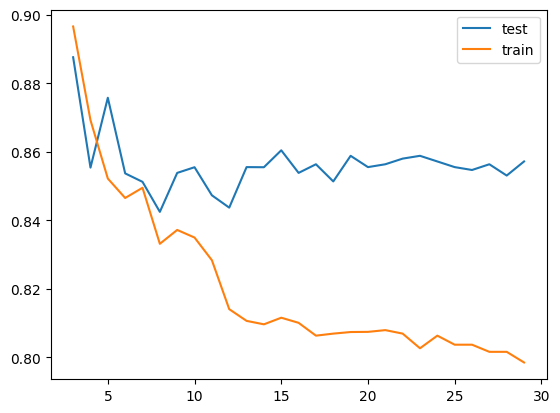

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(3,30)),f1_test_list)
plt.plot(list(range(3,30)),f1_train_list)
plt.legend(['test','train'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# initialization
neigh = KNeighborsClassifier(n_neighbors=3)

# Training
neigh.fit(X_train, y_train)

# Test the training data
y_pred_train = neigh.predict(X_train)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)

print("Accuracy: (train vs test)")
print(accuracy_train,accuracy_test)
print("F1 score: (train vs test)")
print(f1_test,f1_test)

Accuracy: (train vs test)
0.8841145833333334 0.806060606060606
F1 score: (train vs test)
0.815028901734104 0.815028901734104


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=0.00000001)
clf.fit(X_train,y_train)
neigh = clf
y_pred_train1 = neigh.predict(X_train)
f1_train1 = f1_score(y_pred_train1,y_train)
print(f1_train1)

y_pred_test1 = neigh.predict(X_test)
f1_test1 = f1_score(y_pred_test1,y_test)
print(f1_test1)

0.7554347826086957
0.7975460122699388


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.90      0.88      0.89       395
    Negative       0.87      0.89      0.88       373

    accuracy                           0.88       768
   macro avg       0.88      0.88      0.88       768
weighted avg       0.88      0.88      0.88       768



In [ ]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[346,  49],
       [ 40, 333]])

<Axes: >

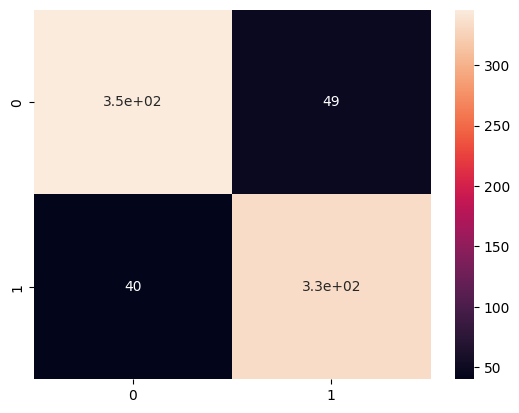

In [ ]:
import seaborn as sns
sns.heatmap(c, annot=True)

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10,class_weight='balanced',random_state=0,solver='lbfgs',n_jobs=-1)
clf.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, random_state=0)

c -> controls inverse of regularization strength,
random_strength -> ensures reproducibility of results,
solver -> optimization algo, for small dataset,
lbfgs -> used to solve large-scale numerical optimization problems.
n_jobs -> uses all available processors to perform the computation.

In [ ]:
y_pred_train = clf.predict(X_train)
f1_train = f1_score(y_pred_train,y_train)
print('F1 score: ',f1_train)
print(classification_report(y_pred_train, y_train, target_names=['Not Survived', 'Survived']))

y_pred_test = clf.predict(X_test)
f1_test = f1_score(y_pred_test,y_test)
print('F1 score: ',f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Not Survived', 'Survived']))


F1 score:  0.7617765814266487
              precision    recall  f1-score   support

Not Survived       0.80      0.76      0.78       407
    Survived       0.74      0.78      0.76       361

    accuracy                           0.77       768
   macro avg       0.77      0.77      0.77       768
weighted avg       0.77      0.77      0.77       768

F1 score:  0.7927927927927928
              precision    recall  f1-score   support

Not Survived       0.79      0.79      0.79       164
    Survived       0.79      0.80      0.79       166

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



<Axes: >

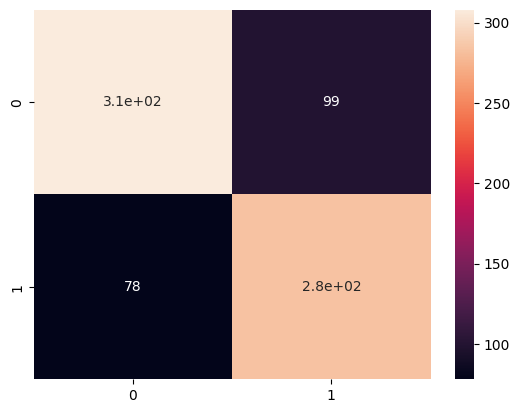

In [ ]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

# Support Vector Machine


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1,random_state=0)
svm.fit(X_train,y_train)

SVC(C=1, kernel='linear', random_state=0)

In [ ]:
y_pred_train = svm.predict(X_train)
f1_train = f1_score(y_pred_train,y_train)
print('F1 score: ',f1_train)
print(classification_report(y_pred_train, y_train, target_names=['Not Survived', 'Survived']))

y_pred_test = svm.predict(X_test)
f1_test = f1_score(y_pred_test,y_test)
print('F1 score: ',f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Not Survived', 'Survived']))


F1 score:  0.7319884726224785
              precision    recall  f1-score   support

Not Survived       0.85      0.72      0.78       456
    Survived       0.66      0.81      0.73       312

    accuracy                           0.76       768
   macro avg       0.76      0.77      0.76       768
weighted avg       0.77      0.76      0.76       768

F1 score:  0.7540983606557379
              precision    recall  f1-score   support

Not Survived       0.86      0.73      0.79       192
    Survived       0.69      0.83      0.75       138

    accuracy                           0.77       330
   macro avg       0.77      0.78      0.77       330
weighted avg       0.79      0.77      0.77       330



<Axes: >

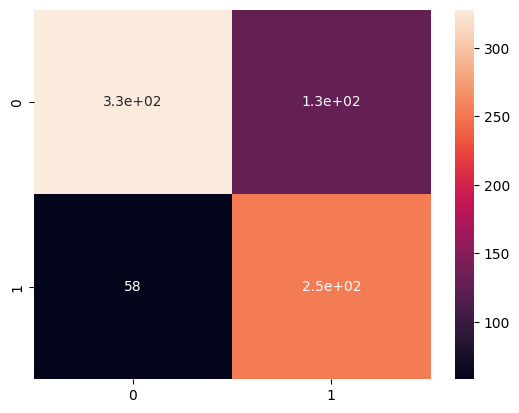

In [ ]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

In [ ]:
target_names

['Postive', 'Negative']

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(X_train, y_train)
y_pred_train4 = dtree.predict(X_train)
accuracy_train4 = accuracy_score(y_pred_train4,y_train)
f1_train4 = f1_score(y_pred_train4,y_train)
y_pred_test4 = dtree.predict(X_test)
accuracy_test4 = accuracy_score(y_pred_test4,y_test)
f1_test4 = f1_score(y_pred_test4,y_test)
print('Accuracy: Train vs Test')
print(accuracy_train4,accuracy_test4)
print('f1 score: Train vs Test')
print(f1_train4,f1_test4)
print(classification_report(y_train, y_pred_train4,target_names = target_names))
print(classification_report(y_test, y_pred_test4,target_names = target_names))


Accuracy: Train vs Test
0.98828125 0.8212121212121212
f1 score: Train vs Test
0.9880794701986755 0.8228228228228228
              precision    recall  f1-score   support

     Postive       0.98      1.00      0.99       386
    Negative       1.00      0.98      0.99       382

    accuracy                           0.99       768
   macro avg       0.99      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768

              precision    recall  f1-score   support

     Postive       0.82      0.82      0.82       163
    Negative       0.83      0.82      0.82       167

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



<Axes: >

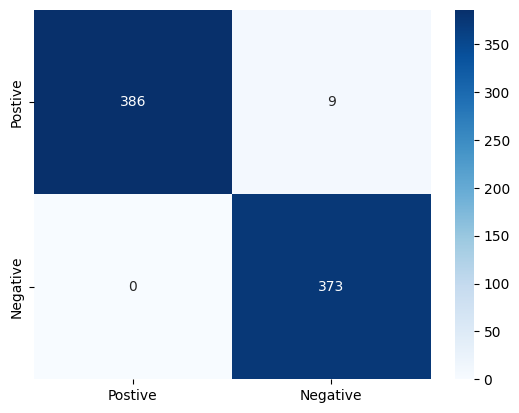

In [ ]:
c1 = confusion_matrix(y_pred_train4, y_train)
sns.heatmap(c1, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)

<Axes: >

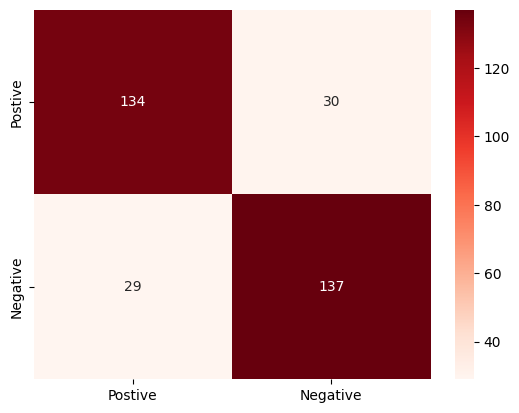

In [ ]:
c2 = confusion_matrix(y_pred_test4, y_test)
sns.heatmap(c2, annot=True,fmt='d', cmap='Reds',
            xticklabels=target_names, yticklabels=target_names)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
rf.fit(X_train, y_train)
y_pred_train5 = rf.predict(X_train)
accuracy_train5 = accuracy_score(y_pred_train5,y_train)
f1_train5 = f1_score(y_pred_train5,y_train)
y_pred_test5 = rf.predict(X_test)
accuracy_test5 = accuracy_score(y_pred_test5,y_test)
f1_test5 = f1_score(y_pred_test5,y_test)
print('Accuracy: Train vs Test')
print(accuracy_train5,accuracy_test5)
print('f1 score: Train vs Test')
print(f1_train5,f1_test5)
print(classification_report(y_train, y_pred_train5,target_names = target_names))
print(classification_report(y_test, y_pred_test5,target_names = target_names))

Accuracy: Train vs Test
0.7734375 0.7878787878787878
f1 score: Train vs Test
0.7629427792915531 0.7839506172839507
              precision    recall  f1-score   support

     Postive       0.75      0.81      0.78       386
    Negative       0.80      0.73      0.76       382

    accuracy                           0.77       768
   macro avg       0.78      0.77      0.77       768
weighted avg       0.78      0.77      0.77       768

              precision    recall  f1-score   support

     Postive       0.77      0.82      0.79       163
    Negative       0.81      0.76      0.78       167

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



<Axes: >

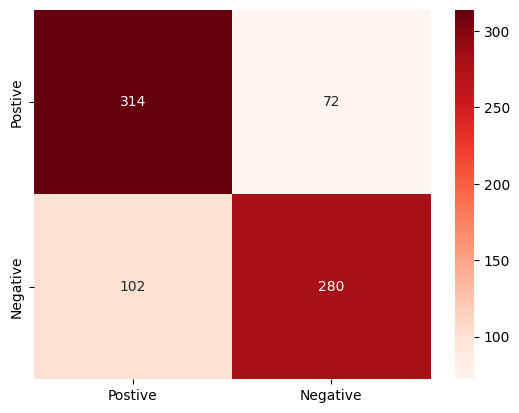

In [ ]:
c1 = confusion_matrix(y_train, y_pred_train5)
sns.heatmap(c1, annot=True,fmt='d',cmap='Reds',
            xticklabels=target_names,yticklabels=target_names)
